In [656]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [657]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from keras.models import load_model
import yfinance as yf
yf.pdr_override()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [658]:
# Set up End and Start times for data grab
end = "2020-12-30"
start ="2018-01-01"

In [659]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'NFLX', 'AMZN']
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [660]:
stock_list = [AAPL, GOOG, NFLX, AMZN]
stock_name = ["APPLE", "GOOGLE", "NETFLIX", "AMAZON",]

for stock, com_name in zip(stock_list, stock_name):
    stock["stock_name"] = com_name
    
df = pd.concat(stock_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,stock_name
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075397,102223600,APPLE
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068253,118071600,APPLE
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259010,89738400,APPLE
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728760,94640000,APPLE
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573761,82271200,APPLE
...,...,...,...,...,...,...,...
2020-12-22,3202.840088,3222.000000,3180.080078,3206.520020,3206.520020,2369400,AMAZON
2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800,AMAZON
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,AMAZON


In [661]:
#Check Data null
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
stock_name    0
dtype: int64

In [662]:
#check data NaN
df.isna().any()

Open          False
High          False
Low           False
Close         False
Adj Close     False
Volume        False
stock_name    False
dtype: bool

In [663]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,64.715590,65.502619,63.973070,64.774042,63.386317,1.353838e+08
std,25.530466,25.926881,25.051341,25.509339,25.655103,6.112212e+07
min,35.994999,36.430000,35.500000,35.547501,34.414242,4.544800e+07
25%,46.520626,46.866874,46.174999,46.516875,44.832863,9.309570e+07
50%,54.039999,54.740000,53.270000,53.868752,52.152164,1.210796e+08
75%,76.709999,77.858747,76.005001,77.342503,76.021803,1.614616e+08
max,138.050003,138.789993,134.339996,136.690002,135.480576,4.265100e+08


In [664]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2018-01-02 to 2020-12-29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        754 non-null    float64
 1   High        754 non-null    float64
 2   Low         754 non-null    float64
 3   Close       754 non-null    float64
 4   Adj Close   754 non-null    float64
 5   Volume      754 non-null    int64  
 6   stock_name  754 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.1+ KB


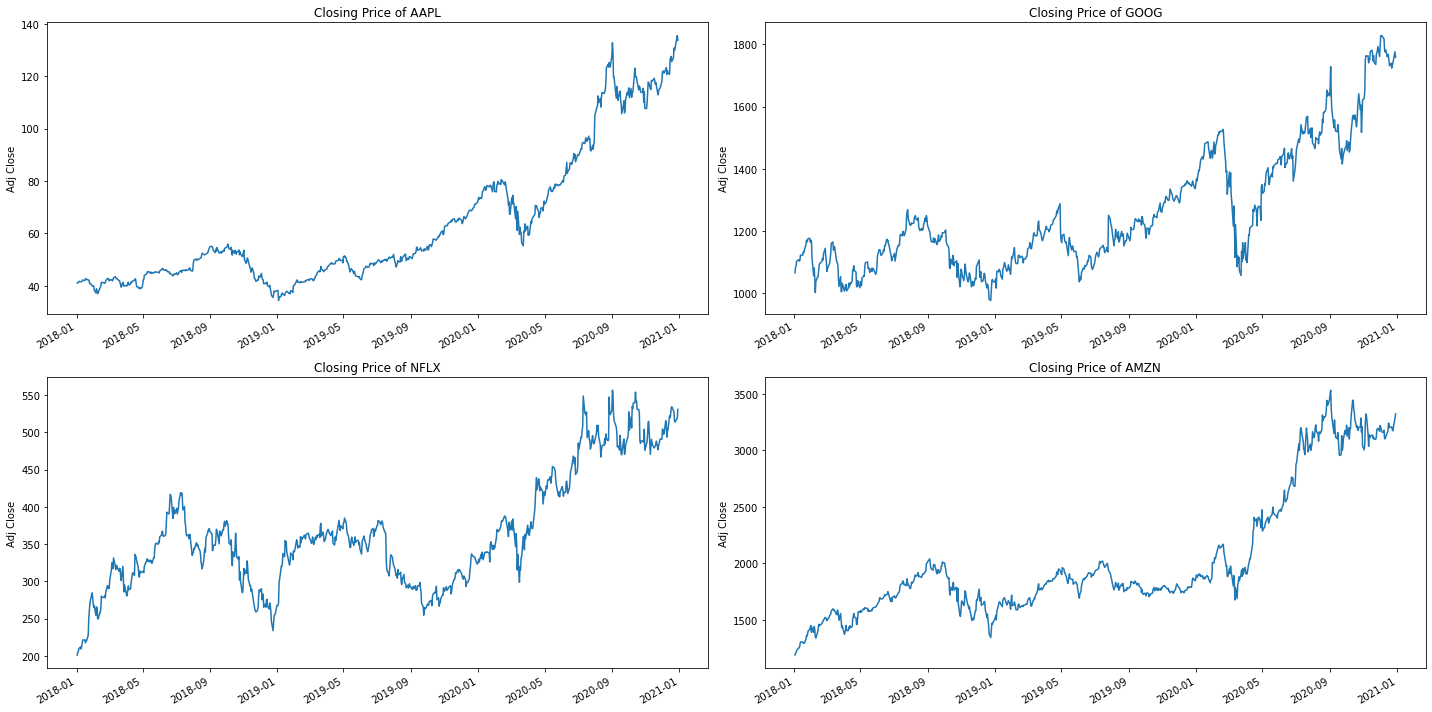

In [665]:
# closing price
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

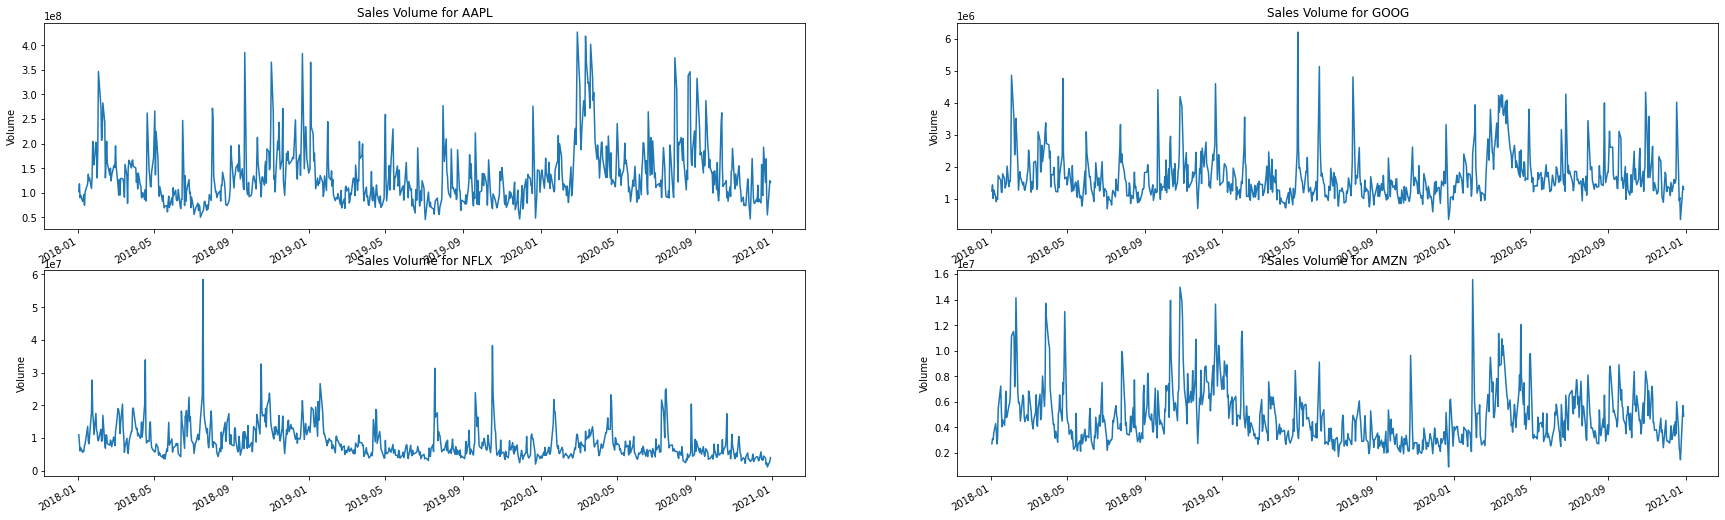

In [666]:
# Volume
plt.figure(figsize=(30, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.show()

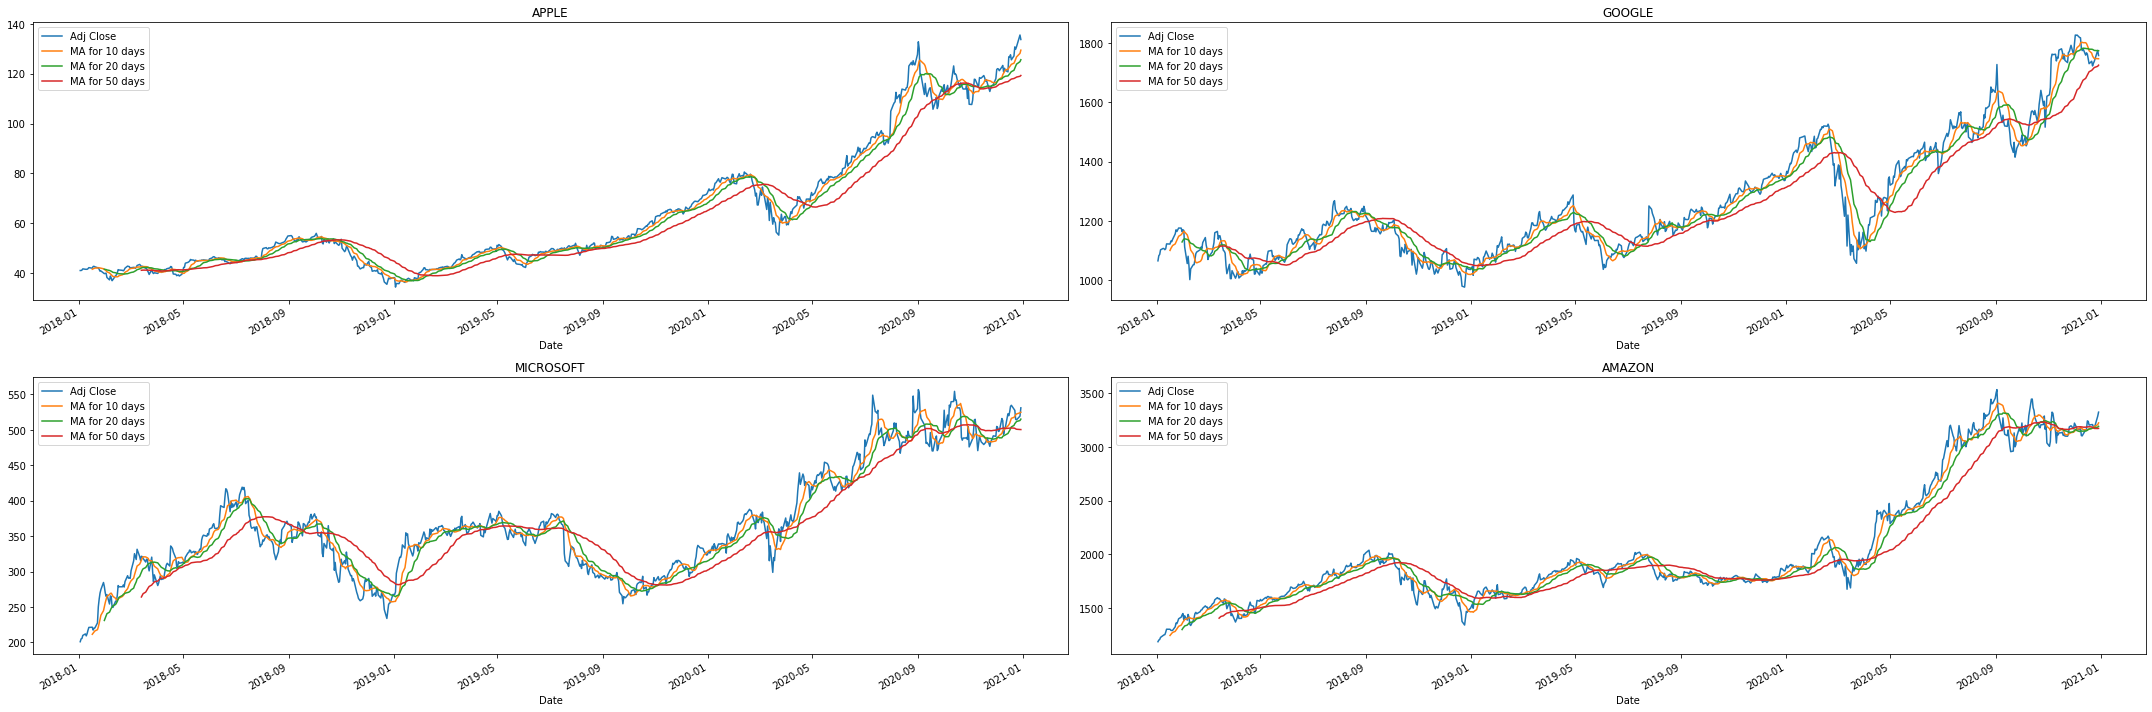

In [667]:
#moving average of the stocks
ma_day = [10, 20, 50]
for ma in ma_day:
    for stock in stock_list:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(30)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [668]:
# Choose potential stock code
df = pdr.get_data_yahoo(tech_list, start=start, end=end)
df = df["Adj Close"]
df

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,NFLX
Date,,,,
2018-01-02,41.075401,1189.010010,1065.000000,201.070007
2018-01-03,41.068241,1204.199951,1082.479980,205.050003
2018-01-04,41.259003,1209.589966,1086.400024,205.630005
2018-01-05,41.728756,1229.140015,1102.229980,209.990005
2018-01-08,41.573769,1246.869995,1106.939941,212.050003
...,...,...,...,...
2020-12-22,130.713135,3206.520020,1723.500000,527.330017
2020-12-23,129.801270,3185.270020,1732.380005,514.479980
2020-12-24,130.802338,3172.689941,1738.849976,513.969971


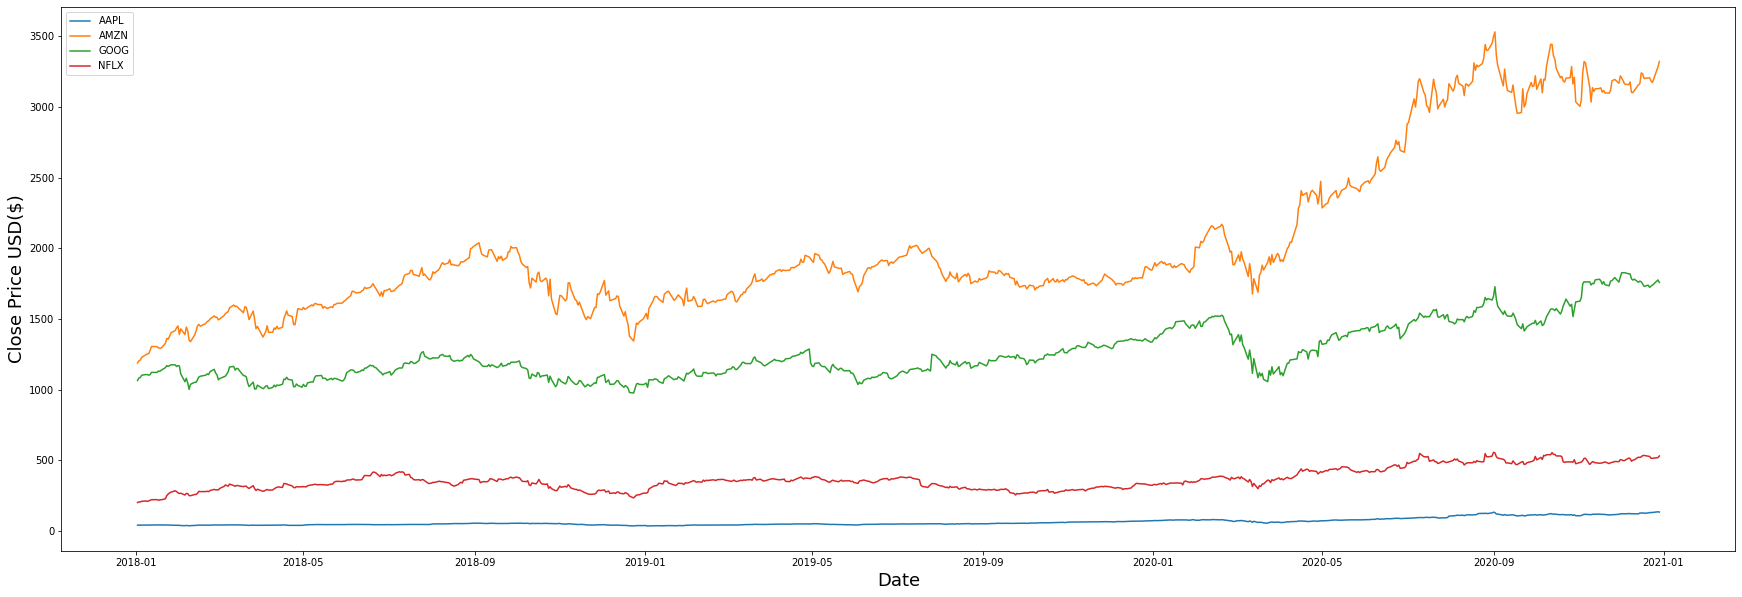

In [669]:

my_stocks=df
plt.figure(figsize=(30,10))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [670]:
#Calculate the percent
my_stocks = df
daily_simple_returns=my_stocks.pct_change(1)
daily_simple_returns.dropna()

,AAPL,AMZN,GOOG,NFLX
Date,,,,
2018-01-03,-0.000174,0.012775,0.016413,0.019794
2018-01-04,0.004645,0.004476,0.003621,0.002829
2018-01-05,0.011385,0.016163,0.014571,0.021203
2018-01-08,-0.003714,0.014425,0.004273,0.009810
2018-01-09,-0.000115,0.004676,-0.000614,-0.012922
...,...,...,...,...
2020-12-22,0.028464,0.000106,-0.009124,-0.002987
2020-12-23,-0.006976,-0.006627,0.005152,-0.024368
2020-12-24,0.007712,-0.003949,0.003735,-0.000991


In [671]:
#Exception
#Show the stock correlation
corr=daily_simple_returns.corr()
corr

,AAPL,AMZN,GOOG,NFLX
AAPL,1.000000,0.655102,0.694943,0.507702
AMZN,0.655102,1.000000,0.685708,0.671134
GOOG,0.694943,0.685708,1.000000,0.545803
NFLX,0.507702,0.671134,0.545803,1.000000


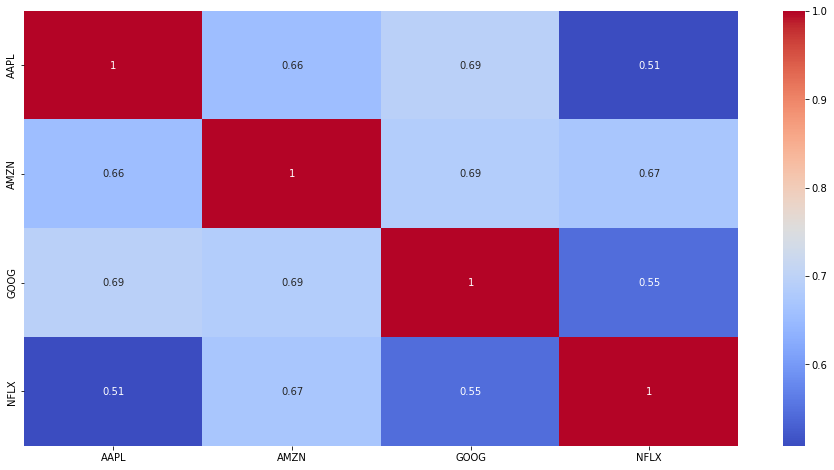

In [672]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [673]:
#Exception
#Show The covariance matrix for simple returns
cov=daily_simple_returns.cov()
cov

,AAPL,AMZN,GOOG,NFLX
AAPL,0.000490,0.000304,0.000299,0.000302
AMZN,0.000304,0.000439,0.000279,0.000378
GOOG,0.000299,0.000279,0.000377,0.000285
NFLX,0.000302,0.000378,0.000285,0.000723


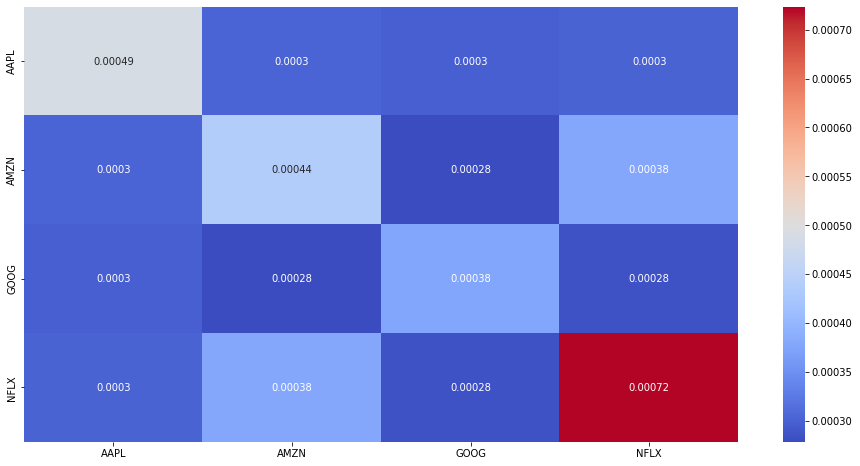

In [674]:
#Exception
plt.figure(figsize=(16, 8))
sns.heatmap(cov, annot=True, cmap='coolwarm')

In [675]:
#Exception
#Show the variance
var=daily_simple_returns.var()
var

AAPL    0.000490
AMZN    0.000439
GOOG    0.000377
NFLX    0.000723
dtype: float64

In [676]:
#Exception
#Print the standard deviation for daily simple returns
std = daily_simple_returns.std()
std

AAPL    0.022136
AMZN    0.020942
GOOG    0.019406
NFLX    0.026893
dtype: float64

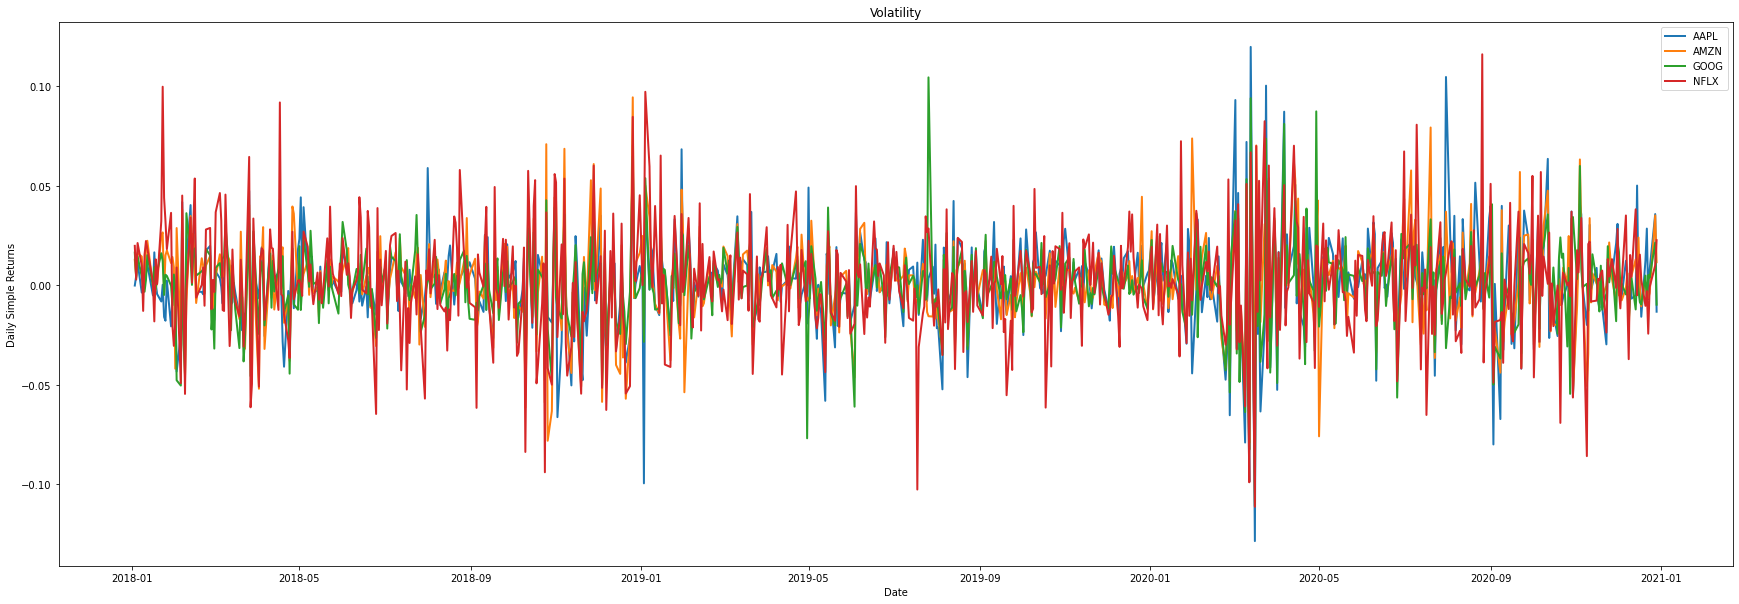

In [677]:
#Volatility
plt.figure(figsize=(30,10))
for i in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[i],lw=2,label=i)
plt.legend(loc='upper right',fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

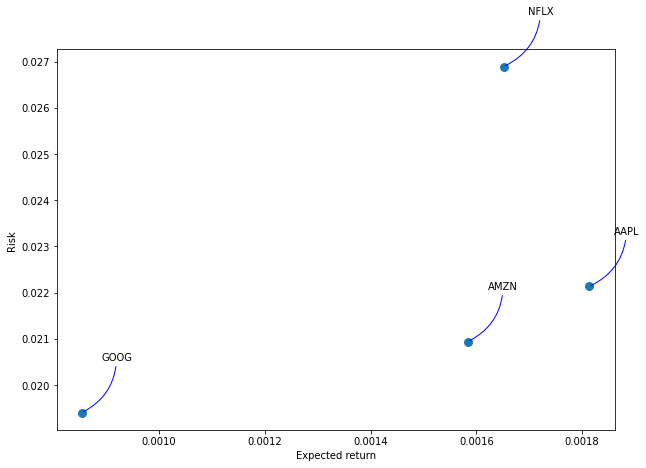

In [678]:
#Risk and daily mean simple return
rets = daily_simple_returns.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.show()

[*********************100%***********************]  1 of 1 completed


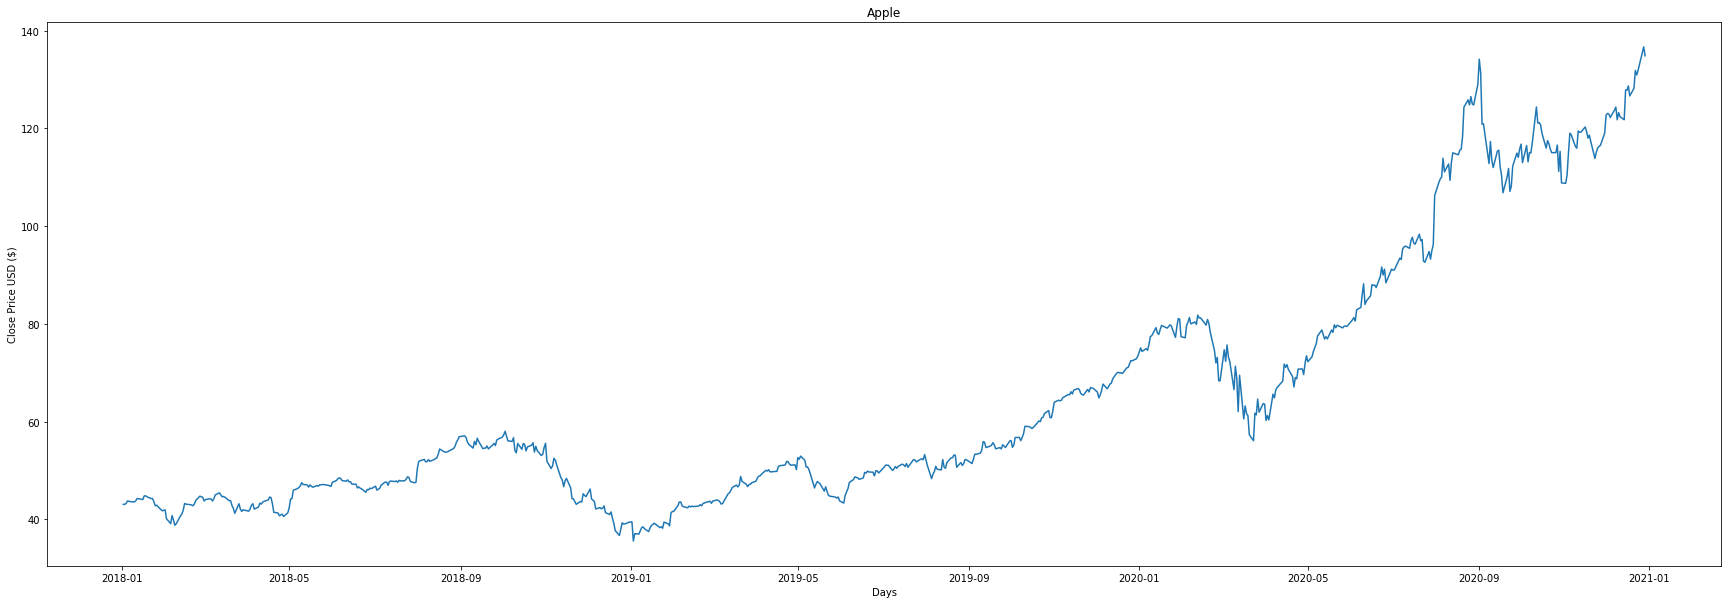

In [679]:
#Predict
stock_selected = pdr.get_data_yahoo("AAPL", start=start, end=end)
# stock_selected.dropna()
stock_selected.shape
# Visualizing the close prices of the data.
plt.figure(figsize=(30,10))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_selected['Close'])
plt.show()

In [680]:
stock_selected = pdr.get_data_yahoo("AAPL", start=start, end=end)
stock_selected = stock_selected["Close"]
stock_selected = pd.DataFrame(stock_selected)
stock_selected

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502
...,...
2020-12-22,131.880005
2020-12-23,130.960007
2020-12-24,131.970001


In [681]:
# Prediction 3 days into the future.
future_days = 30
stock_selected['Prediction'] = stock_selected.shift(-future_days)
stock_selected

,Close,Prediction
Date,,
2018-01-02,43.064999,41.842499
2018-01-03,43.057499,43.247501
2018-01-04,43.257500,43.107498
2018-01-05,43.750000,42.962502
2018-01-08,43.587502,42.767502
...,...,...
2020-12-22,131.880005,NaN
2020-12-23,130.960007,NaN
2020-12-24,131.970001,NaN


In [682]:
#Create the independent data set (X)
x = np.array(stock_selected.drop(['Prediction'], 1))[:-future_days]
y = np.array(stock_selected['Prediction'])[:-future_days]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [683]:
#Split the data in to 80% training data set and a 20% testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [684]:
#Use Random Forest Regresion for the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=2,random_state=545)
forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=2, random_state=545)

In [685]:
forest_prediction = forest.predict(x_test)
valid_test_forest = pd.DataFrame({'Actual':y_test,'Prediction':forest_prediction})
valid_test_forest

,Actual,Prediction
0,91.632500,91.199997
1,55.240002,44.742500
2,36.982498,47.209999
3,66.775002,57.784375
4,109.375000,113.902496
...,...,...
140,48.892502,48.500000
141,52.119999,54.227501
142,46.907501,47.182501
143,73.230003,82.388748


In [686]:
# Đánh giá mô hình random forest 
mse_test_forest = mean_squared_error(y_test,forest_prediction)
rmse_test_forest = np.sqrt(np.mean(((valid_test_forest['Actual']- valid_test_forest['Prediction']) ** 2)))
r2_score_test_forest = r2_score(y_test,forest_prediction)
mae_test_forest = mean_absolute_error(y_test,forest_prediction)
# Show kết quả
print('R2 Score: ',r2_score_test_forest )
print('MAE: ',mae_test_forest )
print('MSE: ',mse_test_forest )
print('RMSE: ',rmse_test_forest )

R2 Score:  0.8795187873178602
MAE:  5.912150935469002
MSE:  67.23898266118576
RMSE:  8.199937966910833


In [687]:
#Get the validate data for the model
#Create a variable to store all of the rows in the data set except the last n rows
temp_stock_select = stock_selected[:-future_days]
#Create a variable to store the independent price value
# x_future = temp_stock_select.tail(future_days)['Close']
x_future = list()
for vl in  temp_stock_select.tail(future_days)['Close']:
    x_future.append([vl])
x_future

[[116.5],
 [113.16000366210938],
 [115.08000183105469],
 [114.97000122070312],
 [116.97000122070312],
 [124.4000015258789],
 [121.0999984741211],
 [121.19000244140625],
 [120.70999908447266],
 [119.0199966430664],
 [115.9800033569336],
 [117.51000213623047],
 [116.87000274658203],
 [115.75],
 [115.04000091552734],
 [115.05000305175781],
 [116.5999984741211],
 [111.19999694824219],
 [115.31999969482422],
 [108.86000061035156],
 [108.7699966430664],
 [110.44000244140625],
 [114.94999694824219],
 [119.02999877929688],
 [118.69000244140625],
 [116.31999969482422],
 [115.97000122070312],
 [119.48999786376953],
 [119.20999908447266],
 [119.26000213623047]]

In [688]:
#Predict 30 days
actual_prices_30_days = stock_selected.tail(future_days)['Close']
forest_prediction = forest.predict(x_future)
valid_predict_forest = pd.DataFrame({'Actual':actual_prices_30_days,'Prediction':forest_prediction})
valid_predict_forest

,Actual,Prediction
Date,,
2020-11-16,120.300003,120.300003
2020-11-17,119.389999,119.325001
2020-11-18,118.029999,118.029999
2020-11-19,118.639999,118.639999
2020-11-20,117.339996,120.139999
2020-11-23,113.849998,113.849998
2020-11-24,115.169998,115.169998
2020-11-25,116.029999,115.169998
2020-11-27,116.589996,115.879997


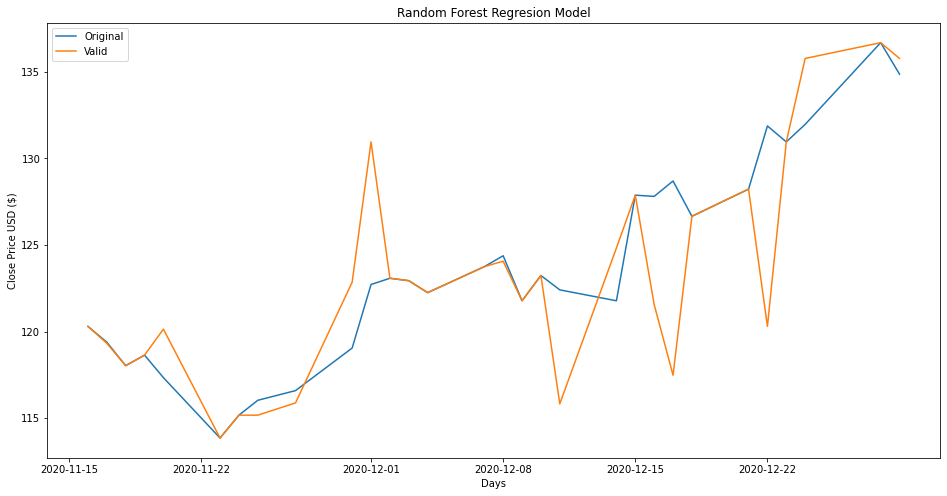

In [689]:
#Show plot Forest
plt.figure(figsize=(16,8))
plt.title("Random Forest Regresion Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(x_train['Close'])
plt.plot(valid_predict_forest)
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [690]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [691]:
tree_prediction = tree.predict(x_test)
valid_test_tree = pd.DataFrame({'Actual':y_test,'Prediction':tree_prediction})
valid_test_tree

,Actual,Prediction
0,91.632500,91.199997
1,55.240002,44.742500
2,36.982498,44.167500
3,66.775002,65.797501
4,109.375000,113.902496
...,...,...
140,48.892502,50.375000
141,52.119999,53.872501
142,46.907501,47.180000
143,73.230003,68.857498


In [692]:
# Đánh giá mô hình  tree decision 
mse_test_tree = mean_squared_error(y_test,tree_prediction)
rmse_test_tree = np.sqrt(np.mean(((valid_test_tree['Actual']- valid_test_tree['Prediction']) ** 2)))
r2_score_test_tree = r2_score(y_test,tree_prediction)
mae_test_tree = mean_absolute_error(y_test,tree_prediction)
# Show kết quả
print('R2 Score: ',r2_score_test_tree )
print('MAE: ',mae_test_tree )
print('MSE: ',mse_test_tree )
print('RMSE: ',rmse_test_tree )

R2 Score:  0.8646262256889685
MAE:  6.15165523660594
MSE:  75.55032573994059
RMSE:  8.691969036986993


In [693]:
#Predict 30 days
tree_prediction = tree.predict(x_future)
valid_predict_tree = pd.DataFrame({'Actual':actual_prices_30_days,'Prediction':tree_prediction})
valid_predict_tree

,Actual,Prediction
Date,,
2020-11-16,120.300003,120.300003
2020-11-17,119.389999,119.389999
2020-11-18,118.029999,118.029999
2020-11-19,118.639999,118.639999
2020-11-20,117.339996,117.339996
2020-11-23,113.849998,113.849998
2020-11-24,115.169998,115.169998
2020-11-25,116.029999,115.169998
2020-11-27,116.589996,116.589996


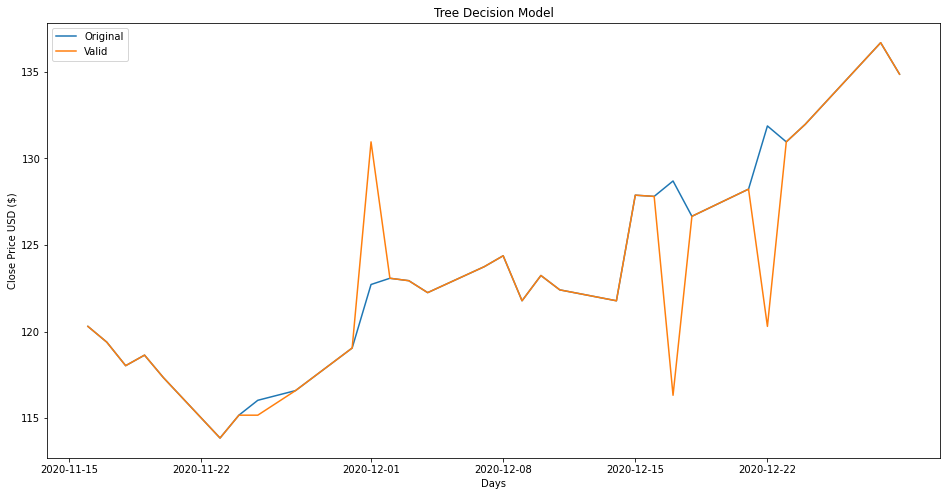

In [694]:
#Show plot Tree Decision
plt.figure(figsize=(16,8))
plt.title("Tree Decision Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(x_train['Close'])
plt.plot(valid_predict_tree)
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [695]:
# Implementing Linear and Decision Tree Regression Algorithms.
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [696]:
lr_prediction = lr.predict(x_test)
valid_test_lr = pd.DataFrame({'Actual':y_test,'Prediction':lr_prediction})
valid_test_lr

,Actual,Prediction
0,91.632500,82.976546
1,55.240002,52.395045
2,36.982498,46.577785
3,66.775002,59.783971
4,109.375000,95.309876
...,...,...
140,48.892502,48.882540
141,52.119999,50.288071
142,46.907501,44.750333
143,73.230003,83.685905


In [697]:
# Đánh giá mô hình linear regression
mse_test_lr = mean_squared_error(y_test,lr_prediction)
rmse_test_lr = np.sqrt(np.mean(((valid_test_lr['Actual']- valid_test_lr['Prediction']) ** 2)))
r2_score_test_lr = r2_score(y_test,lr_prediction)
mae_test_lr = mean_absolute_error(y_test,lr_prediction)
# Show kết quả
print('R2 Score: ',r2_score_test_lr )
print('MAE: ',mae_test_lr )
print('MSE: ',mse_test_lr )
print('RMSE: ',rmse_test_lr )

R2 Score:  0.8886273030430252
MAE:  5.870218422960549
MSE:  62.1556396462935
RMSE:  7.883884806762051


In [698]:
#Predict 30 days
lr_prediction = lr.predict(x_future)
valid_predict_lr = pd.DataFrame({'Actual':actual_prices_30_days,'Prediction':lr_prediction})
valid_predict_lr

,Actual,Prediction
Date,,
2020-11-16,120.300003,122.792877
2020-11-17,119.389999,119.269825
2020-11-18,118.029999,121.295053
2020-11-19,118.639999,121.179023
2020-11-20,117.339996,123.288638
2020-11-23,113.849998,131.125855
2020-11-24,115.169998,127.644988
2020-11-25,116.029999,127.739925
2020-11-27,116.589996,127.233614


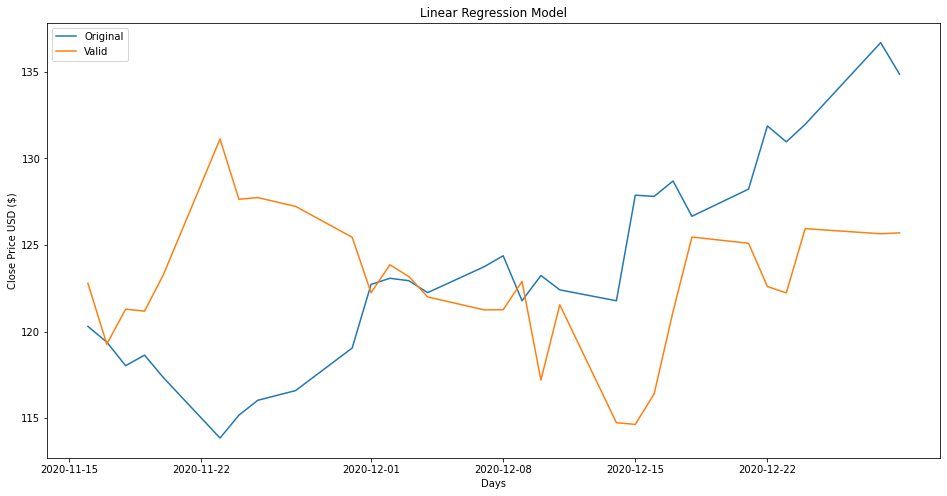

In [699]:
#Show plot Linear Regression
plt.figure(figsize=(16,8))
plt.title("Linear Regression Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(x_train['Close'])
plt.plot(valid_predict_lr)
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [700]:
x_future = stock_selected.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [701]:
stock_selected2 =  pdr.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [702]:
# Create a new dataframe with only the 'Close column 
data = stock_selected2.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8 ))
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [703]:
# Create a new dataframe with only the 'Close column 
data = stock_selected.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [704]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
   

In [705]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

544/544 [==============================] - 30s 49ms/step - loss: 0.0015


In [706]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions
Date,,
2020-05-28,79.562500,80.815819
2020-05-29,79.485001,80.997765
2020-06-01,80.462502,81.130432
2020-06-02,80.834999,81.311432
2020-06-03,81.279999,81.536957
...,...,...
2020-12-22,131.880005,129.961273
2020-12-23,130.960007,130.886246
2020-12-24,131.970001,131.770538


In [707]:
# Đánh giá mô hình  LSTM
mse_test_lstm = mean_squared_error(valid['Close'],valid['Predictions'])
rmse_test_lstm = np.sqrt(np.mean(((valid['Close'] - valid['Predictions']) ** 2)))
r2_score_test_lstm = r2_score(valid['Close'],valid['Predictions'])
mae_test_lstm = mean_absolute_error(valid['Close'],valid['Predictions'])
# Show kết quả
print('R2 Score: ',r2_score_test_lstm )
print('MAE: ',mae_test_lstm )
print('MSE: ',mse_test_lstm )
print('RMSE: ',rmse_test_lstm )

R2 Score:  0.8845549972103861
MAE:  3.445842793782552
MSE:  23.784373183616747
RMSE:  4.876922511545241


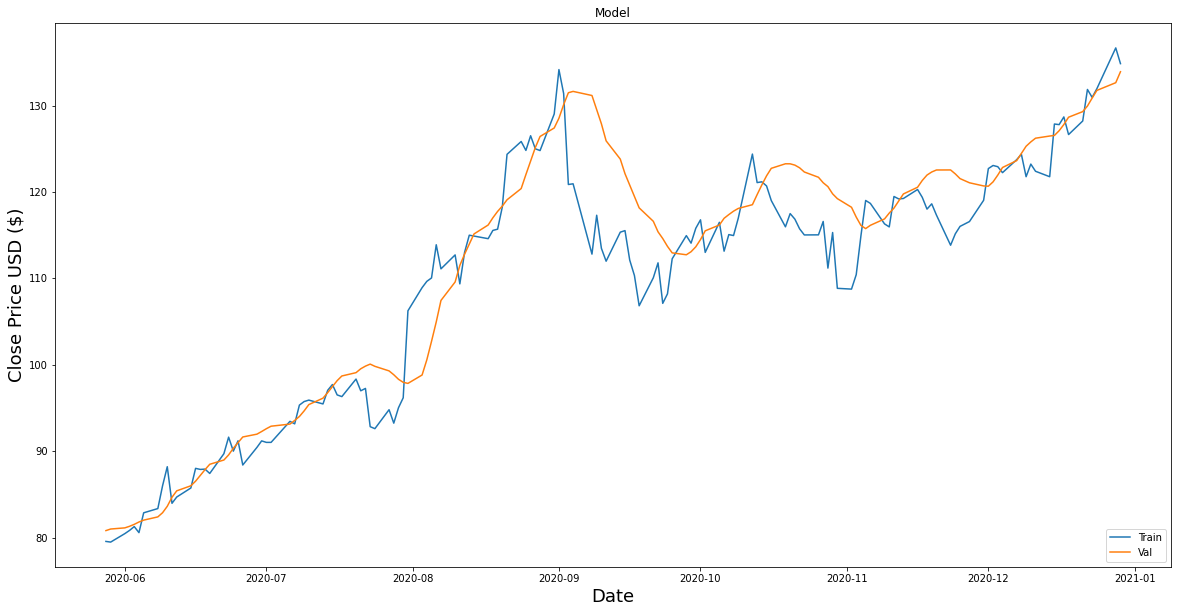

In [708]:
# Plot the data LSTM Model
# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [709]:
#Sumary Evaluate Regression Models
evaluate_models = pd.DataFrame({'R2-Score':[r2_score_test_forest,r2_score_test_tree,r2_score_test_lr,r2_score_test_lstm], 
                                'MAE':[mae_test_forest,mae_test_tree,mae_test_lr,mae_test_lstm] ,
                                'MSE': [mse_test_forest,mse_test_tree,mse_test_lr,mse_test_lstm],
                                'RMSE': [rmse_test_forest,rmse_test_tree,rmse_test_lr,rmse_test_lstm]},
                                index=['Random Forest','Decision Tree','Linear','LSTM'])
evaluate_models

,R2-Score,MAE,MSE,RMSE
Random Forest,0.879519,5.912151,67.238983,8.199938
Decision Tree,0.864626,6.151655,75.550326,8.691969
Linear,0.888627,5.870218,62.155640,7.883885
LSTM,0.884555,3.445843,23.784373,4.876923


In [710]:
#Predct using SVR
days = list()
close_prices = list()
user_input_2 ='AAPL'
df2 = pdr.get_data_yahoo(user_input_2, start=start, end=end)
#Show data from 01-30 month 12 2020
df2


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075405,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068241,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259010,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728764,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573765,82271200
...,...,...,...,...,...,...
2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713135,168904800
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802338,54930100


In [711]:
#Show the data set
df2.head()
df2.tail()
#Get 100 days
df_train = df2.tail(100)
df_test = df_train.tail(1)
df_train = df_train.head(99)
df2 = df2.reset_index()
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df2.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume
654,2020-08-07,113.205002,113.675003,110.292503,111.112503,109.939720,198045600
655,2020-08-10,112.599998,113.775002,110.000000,112.727501,111.537659,212403600
656,2020-08-11,111.970001,112.482498,109.107498,109.375000,108.220558,187902400
657,2020-08-12,110.497498,113.275002,110.297501,113.010002,111.817177,165598000
658,2020-08-13,114.430000,116.042503,113.927498,115.010002,113.796082,210082000
...,...,...,...,...,...,...,...
749,2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713135,168904800
750,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
751,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802338,54930100
752,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480576,124486200


In [712]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-07,113.205002,113.675003,110.292503,111.112503,109.939720,198045600
1,2020-08-10,112.599998,113.775002,110.000000,112.727501,111.537659,212403600
2,2020-08-11,111.970001,112.482498,109.107498,109.375000,108.220558,187902400
3,2020-08-12,110.497498,113.275002,110.297501,113.010002,111.817177,165598000
4,2020-08-13,114.430000,116.042503,113.927498,115.010002,113.796082,210082000
...,...,...,...,...,...,...,...
94,2020-12-21,125.019997,128.309998,123.449997,128.229996,127.095421,121251600
95,2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713135,168904800
96,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
97,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802338,54930100


In [713]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676682,121047300


In [714]:
days = list()             
close_prices = list()
#Get only the dates and the adjusted close prices
df_days = df_train.loc[:, 'Date']
df_close = df_train.loc[:, 'Close']

In [715]:
#Create the independent data set (days)
for i in range(len(df_days)):
  days.append([i+1])
#Create the dependent data set (adj close prices)
for close_price in df_close:
  close_prices.append(float(close_price))

In [716]:
#Create 3 models linear, poly, rbf
from sklearn.svm import SVR
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, close_prices)

poly_svr = SVR(kernel='poly', C= 1000.0, degree=2)
poly_svr.fit(days, close_prices)

rbf_svr = SVR(kernel='rbf', C= 1000.0, gamma=0.85)
rbf_svr.fit(days, close_prices)

SVR(C=1000.0, gamma=0.85)

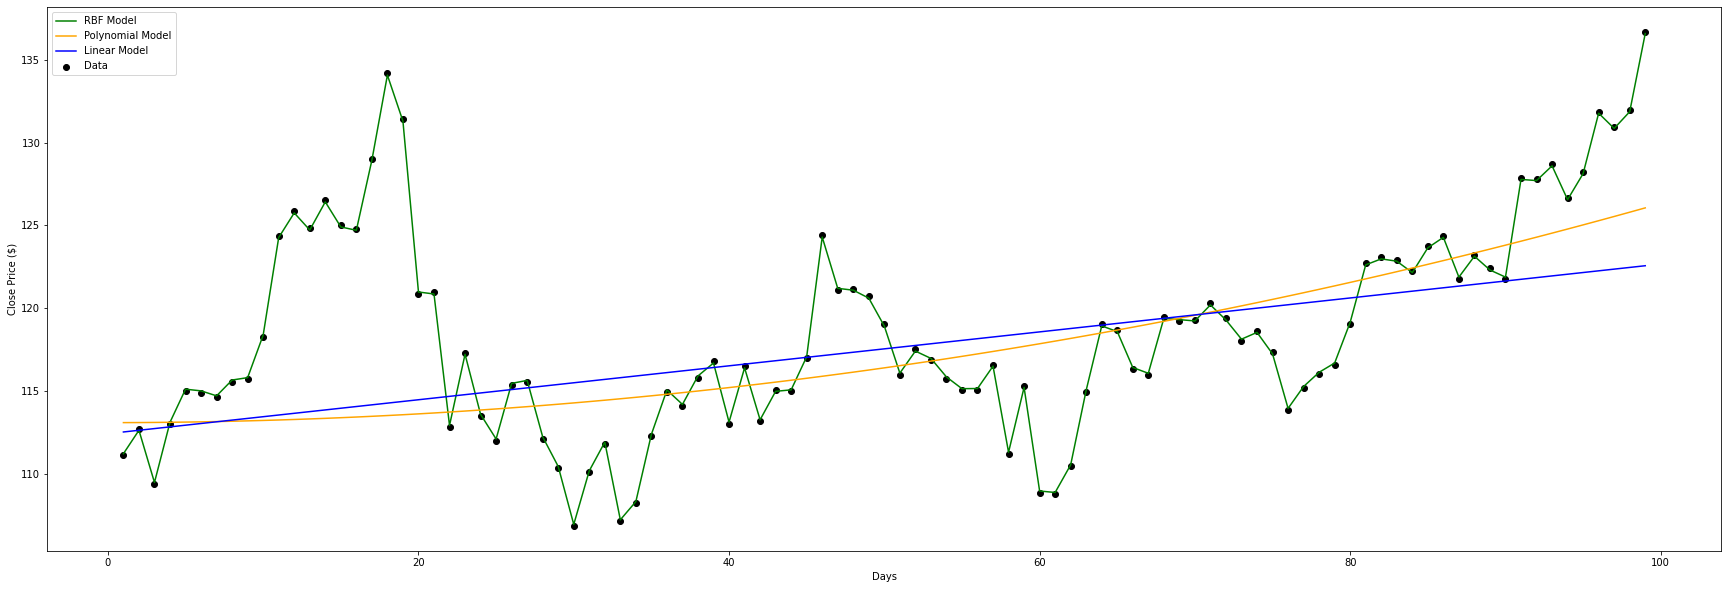

In [717]:
#Plot the models
plt.figure(figsize=(30,10))
plt.scatter(days, close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

In [718]:
arr_days_predict = list()
number_days_input = 1
for i in range(number_days_input):
  arr_days_predict.append([i+1+len(days)])

In [719]:
arr_days_predict

[[100]]

In [720]:
for vl in df_test["Close"]:
  print(vl)

134.8699951171875


In [721]:
for vl in rbf_svr.predict(arr_days_predict):
  print(vl)

125.72439621396211


In [722]:
for vl in lin_svr.predict(arr_days_predict):
  print(vl)

122.6687842413121


In [723]:
for vl in poly_svr.predict(arr_days_predict):
  print(vl)

126.32371298863572
